In [104]:
from config import api_key
import pandas as pd
import numpy as np
import requests 
import brewerydb as br
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
plt.rcParams.update({'font.size': 22})
#%matplotlib notebook

In [3]:
beer_data = pd.read_csv('data/beers.csv')
brew_data = pd.read_csv('data/brewery_data.csv')
print(beer_data.head())
print(brew_data.head())

brew_data_s = brew_data[['Brewery ID','Brewery Name']]
brew_data_s['brewery_id'] = brew_data_s['Brewery ID']

   Unnamed: 0 beer_id                       name               display_name  \
0           0  c4f2KE           'Murican Pilsner           'Murican Pilsner   
1           1  zTTWa2                11.5° PLATO                11.5° PLATO   
2           2  zfP2fK              12th Of Never              12th Of Never   
3           3  xwYSL2       15th Anniversary Ale       15th Anniversary Ale   
4           4  UJGpVS  16 So Fine Red Wheat Wine  16 So Fine Red Wheat Wine   

    abv   ibu  style_id  year  glass_id organic brewery_id retired    status  \
0   5.5  32.5      98.0   NaN       4.0       N     nHLlnK       N  verified   
1   4.5  35.0     164.0   NaN       NaN       N     nHLlnK       N  verified   
2   5.5  45.0      25.0   NaN       NaN       N     nLsoQ9       N  verified   
3   NaN  37.5       5.0   NaN       NaN       N     TMc6H2       N  verified   
4  11.0  65.0      35.0   NaN       NaN       N     TMc6H2       N  verified   

   ingredients              hops      malt m

C:\Users\norfe\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [6]:
beerbrewed = pd.merge(beer_data,brew_data_s,how = 'left',on=['brewery_id'])

In [30]:
beerbrewed['short_name'] =beerbrewed['Brewery Name'].str.split(n=1,expand=True)[0]
beerbrewed['short_name'] = beerbrewed['short_name'].replace('New','New Holland')
beerbrewed['short_name'] = beerbrewed['short_name'].replace('Zero','Zero Gravity')
beerbrewed['short_name'] = beerbrewed['short_name'].replace('Laughing','Laughing Dog')
beerbrewed['short_name'] = beerbrewed['short_name'].replace('Sierra','Sierra Nevada')

In [31]:
bb =beerbrewed['short_name'].value_counts()
x_axis = np.arange(len(bb))


Sierra Nevada     286
Oskar             124
New Holland       102
Lagunitas          92
SweetWater         80
Jackalope          74
Anheuser-Busch     72
Breckenridge       66
Zero Gravity       52
Portsmouth         28
Guinness           26
Laughing Dog       26
Wachusett          24
Dock               21
Miller              9
Last                9
Brouwerij           6
Name: short_name, dtype: int64

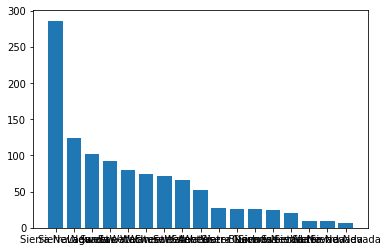

In [103]:
plt.bar(x_axis,bb)
xlabel = beerbrewed['short_name']
plt.xticks(np.arange(17),xlabel)
bb

In [ ]:
bb[0:7].values

In [70]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import imread

def image_plot(heights, images, spacing=0,width = 200):
    # Iterate through images and data, autoscaling the width to
    # the aspect ratio of the image
    for i, (height, img) in enumerate(zip(heights, images)):
        AR = img.shape[1] / img.shape[0]
        #width = 200 #height * AR
        left = width*i + spacing*i
        right = left + width
        plt.imshow(img, extent=[left, right, 0, height])
    # Set x,y limits on plot window
    plt.xlim(0, right)
    plt.ylim(0, max(heights)*1.1)

In [78]:
sierraNevada = imread('Images/sierraNevada.jpg')
inbev = imread('Images/inbev.jpg').swapaxes(0, 1)
oskar = imread('Images/oskarBrew.jpg')
jack = imread('Images/jack.png')
lagun = imread('Images/lagun.png')
nH = imread('Images/newHolland.jpg')
sweet = imread('Images/sweetwater.jpg')
zero = imread('Images/zero.png')
wach = imread('Images/wach.jpg')
port = imread('Images/port.jpg')

C:\Users\norfe\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.
C:\Users\norfe\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
C:\Users\norfe\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\norfe\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after remov

In [16]:
images = [sierraNevada, oskar, nH, lagun, sweet, jack, inbev]
brew_names = bb[0:7].index.str.split(n=1,expand=True)[0]
brew_names

'Sierra'

In [33]:
xt = np.arange(100, 1400,200)
xl = bb.index[0:7]



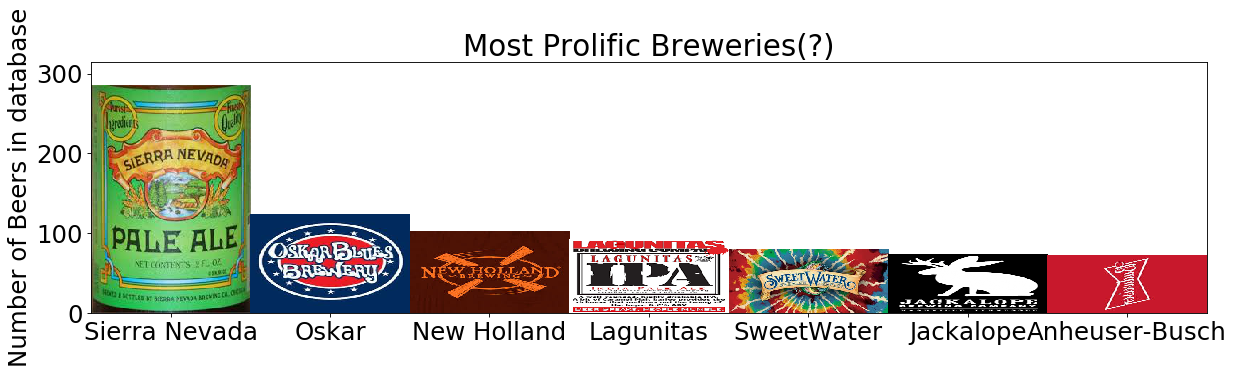

In [125]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
image_plot(bb[0:7].values,images)
plt.xticks(xt,xl,rotation=0)#-45)
plt.ylabel('Number of Beers in database')
plt.title('Most Prolific Breweries(?)')
plt.savefig('Images/prolific.png')
#plt.xticks()

In [68]:
hops_per = round(beerbrewed.groupby('short_name').count()['hops'].divide(1/100*beerbrewed.groupby('short_name').count()['beer_id']),1)
hops_per = hops_per.sort_values(ascending = False)
ing_per = round(beerbrewed.groupby('short_name').sum()['ingredients'].divide(beerbrewed.groupby('short_name').count()['beer_id']),2)
ing_per = ing_per.sort_values(ascending = False)


Index(['Zero Gravity', 'Wachusett', 'Portsmouth', 'New Holland', 'SweetWater',
       'Guinness', 'Sierra Nevada', 'Breckenridge', 'Oskar', 'Brouwerij',
       'Dock', 'Laughing Dog', 'Jackalope', 'Lagunitas', 'Last', 'Miller',
       'Anheuser-Busch'],
      dtype='object', name='short_name')


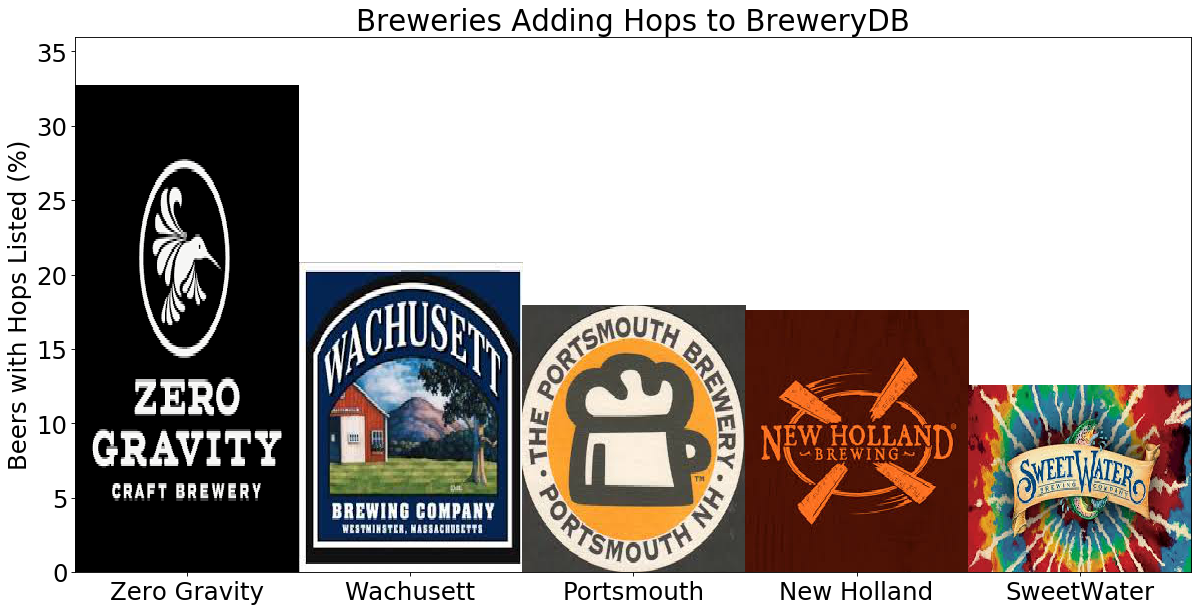

In [124]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
print(hops_per.index)
image_hop = [zero, wach, port, nH, sweet]
image_plot(hops_per[0:5].values,image_hop,width =15)
plt.xticks(np.arange(7.5,15*5+7.5,15),hops_per[0:5].index)
plt.ylabel('Beers with Hops Listed (%)')
plt.title('Breweries Adding Hops to BreweryDB')
plt.savefig('Images/hops.png')

Index(['Zero Gravity', 'New Holland', 'Anheuser-Busch', 'Wachusett',
       'Portsmouth', 'SweetWater', 'Guinness', 'Breckenridge', 'Sierra Nevada',
       'Oskar', 'Lagunitas', 'Miller', 'Last', 'Jackalope', 'Dock',
       'Brouwerij', 'Laughing Dog'],
      dtype='object', name='short_name')


(0, 1)

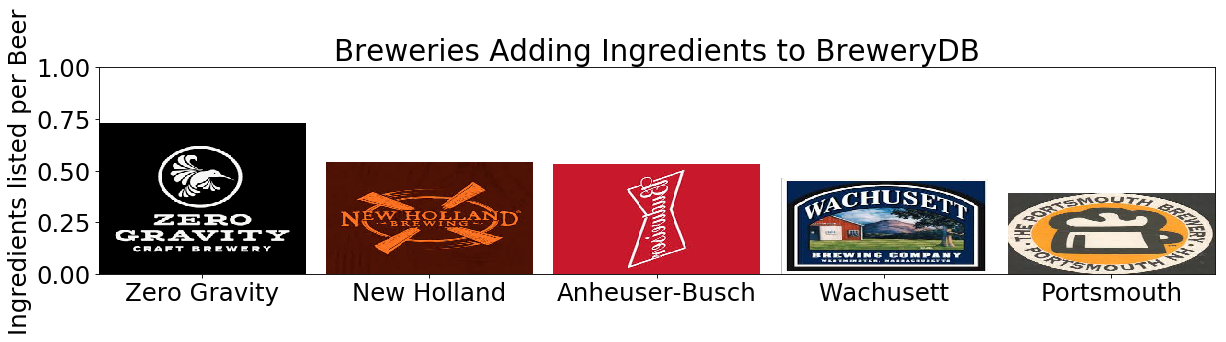

In [123]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
print(ing_per.index)
image_ing = [zero, nH,inbev,wach,port]
image_plot(ing_per[0:5].values,image_ing,width =1,spacing =.1)
plt.xticks(np.arange(.5,1.1*5+.5,1.1),ing_per[0:5].index,rotation =0)
plt.ylabel('Ingredients listed per Beer')
plt.title('Breweries Adding Ingredients to BreweryDB')
plt.savefig('Images/ing.png')
plt.ylim(0,1)

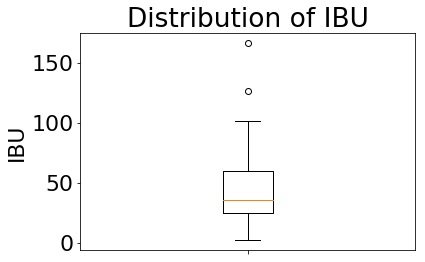

In [122]:
# Create box plot
plt.boxplot(beer_data[beer_data['ibu'].notna()]['ibu'])
plt.title('Distribution of IBU')
plt.ylabel('IBU')
plt.xticks([1],[''])
plt.savefig('Images/dist_ibu.png')

In [147]:
beerbrewed.sort_values('ibu',ascending=False)

,Unnamed: 0,beer_id,name,display_name,abv,ibu,style_id,year,glass_id,organic,...,retired,status,ingredients,hops,malt,misc,yeast,Brewery ID,Brewery Name,short_name
318,318,69tWZj,Dank Tank Ghoulash,Dank Tank Ghoulash,8.50,167.0,31.0,NaN,5.0,N,...,N,verified,2,30;33;45;11;79;82;84;90;98;133;1933;135;157;,1936;650;1950;,NaN,NaN,TMc6H2,SweetWater Brewing Company,SweetWater
49,49,aG4Ie2,Alpha Dog Imperial IPA,Alpha Dog Imperial IPA,8.50,127.0,31.0,NaN,NaN,N,...,N,verified,0,NaN,NaN,NaN,NaN,yX6twV,Laughing Dog Brewing,Laughing Dog
555,555,Pni8Jo,Hop Stoopid,Hop Stoopid,8.00,102.0,31.0,NaN,5.0,N,...,N,verified,0,NaN,NaN,NaN,NaN,nLsoQ9,Lagunitas Brewing Company,Lagunitas
549,549,7HHwqy,Hop Hash,Hop Hash,7.80,100.0,31.0,NaN,5.0,N,...,N,verified,2,24;,724;1922;854;,NaN,NaN,TMc6H2,SweetWater Brewing Company,SweetWater
567,567,KQDQgO,Hoptimum,Hoptimum,10.40,100.0,31.0,NaN,5.0,N,...,N,verified,0,NaN,NaN,NaN,NaN,nHLlnK,Sierra Nevada Brewing Company,Sierra Nevada
484,484,coUX1m,Gubna,Gubna,10.00,100.0,31.0,NaN,5.0,N,...,N,verified,0,NaN,NaN,NaN,NaN,q6vJUK,Oskar Blues Brewery,Oskar
485,485,pq9MUi,Gubna Barrel Aged,Gubna Barrel Aged,11.00,100.0,31.0,NaN,NaN,N,...,N,verified,0,NaN,NaN,NaN,NaN,q6vJUK,Oskar Blues Brewery,Oskar
1007,1007,ABoSrf,The Waldos’ Special Ale (2018),The Waldos’ Special Ale (2018),11.30,100.0,31.0,NaN,NaN,N,...,N,verified,0,NaN,NaN,NaN,NaN,nLsoQ9,Lagunitas Brewing Company,Lagunitas
820,820,bFMDB3,Portsmouth Barleywine,Portsmouth Barleywine,11.00,100.0,34.0,NaN,8.0,N,...,N,verified,2,79;134;,370;481;650;790;1922;854;,NaN,NaN,4F7QA9,Portsmouth Brewery,Portsmouth
319,319,BlcFcv,Dank Tank Magnum IP,Dank Tank Magnum IP,9.00,100.0,76.0,NaN,NaN,N,...,Y,verified,0,NaN,NaN,NaN,NaN,TMc6H2,SweetWater Brewing Company,SweetWater


In [140]:
bins = [0, np.percentile(beer_data[beer_data['ibu'].notna()]['ibu'],25), np.percentile(beer_data[beer_data['ibu'].notna()]['ibu'],50),
            np.percentile(beer_data[beer_data['ibu'].notna()]['ibu'],75),101]

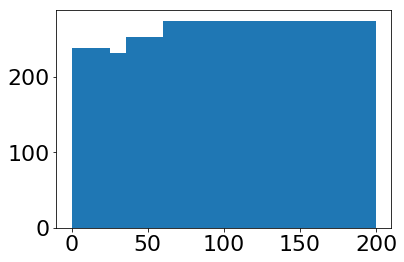

In [138]:
den = plt.hist(beer_data[beer_data['ibu'].notna()]['ibu'],bins=bins)


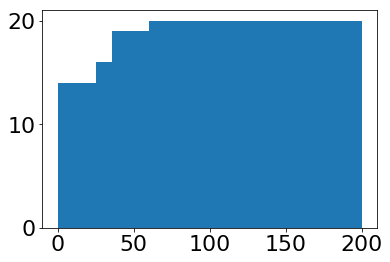

In [139]:
num = plt.hist(beer_data[beer_data['hops'].notna()& beer_data['ibu'].notna()]['ibu'],bins=bins)

In [141]:
frac_hop = num[0]/den[0]
frac_hop

center = [(bins[i] + bins[i+1])/2 for i in np.arange(len(bins)-1)]
center

[12.5, 30.5, 48.0, 80.5]

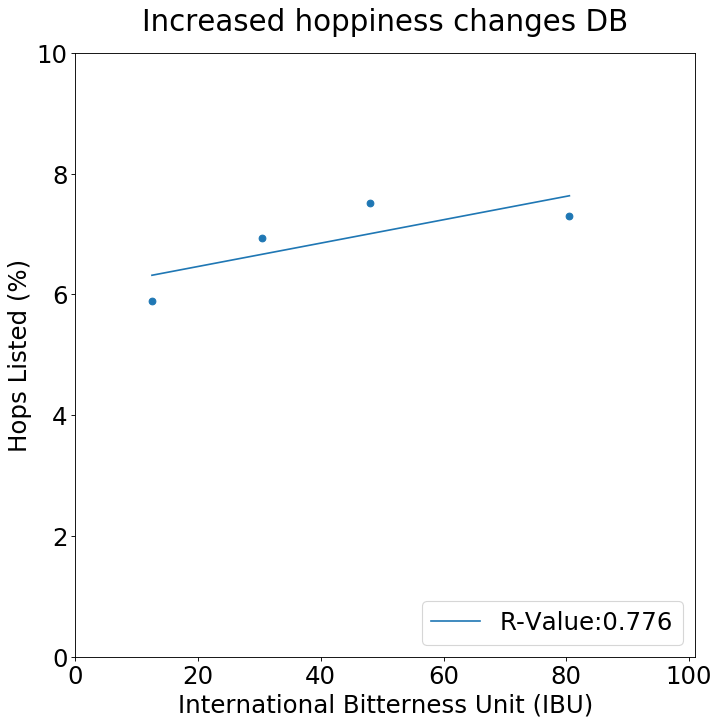

In [142]:
fig=plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
sun = plt.subplot()
hop_plot = plt.scatter(center,frac_hop*100)
plt.xlim(0,101)
plt.ylim(0,10)
plt.xlabel('International Bitterness Unit (IBU)')
plt.ylabel('Hops Listed (%)')
plt.title('Increased hoppiness changes DB',pad=20)
lin = linregress(center,frac_hop)
plt.plot(center,[100*(lin[0]*el +lin[1]) for el in center],label='R-Value:' + str(round(lin[2],3)))
plt.legend(loc ='lower right')
plt.savefig('Images/ibu_regress.png')

In [143]:
lin

LinregressResult(slope=0.00019356025116826236, intercept=0.060745882639913255, rvalue=0.7757114636096988, pvalue=0.22428853639030122, stderr=0.00011135012457584894)

In [131]:
help(plt.title)

Help on function title in module matplotlib.pyplot:

title(s, *args, **kwargs)
    Set a title of the current axes.
    
    Set one of the three available axes titles. The available titles are
    positioned above the axes in the center, flush with the left edge,
    and flush with the right edge.
    
    .. seealso::
        See :func:`~matplotlib.pyplot.text` for adding text
        to the current axes
    
    Parameters
    ----------
    label : str
        Text to use for the title
    
    fontdict : dict
        A dictionary controlling the appearance of the title text,
        the default `fontdict` is:
    
            {'fontsize': rcParams['axes.titlesize'],
            'fontweight' : rcParams['axes.titleweight'],
            'verticalalignment': 'baseline',
            'horizontalalignment': loc}
    
    loc : {'center', 'left', 'right'}, str, optional
        Which title to set, defaults to 'center'
    
    Returns
    -------
    text : :class:`~matplotlib.text.Text`
